In [17]:
from silence_tensorflow import silence_tensorflow
silence_tensorflow()
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
clf_model =  Sequential()

clf_model.add(Dense(128, activation='relu', input_dim=512,
                    kernel_regularizer=l2(0.001)))
clf_model.add(Dropout(0.3))

clf_model.add(Dense(1, activation='sigmoid'))

clf_model.summary()

clf_model.compile(optimizer=Adam(learning_rate=0.0001), 
                  loss='binary_crossentropy', metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 65,793
Trainable params: 65,793
Non-trainable params: 0
_________________________________________________________________


In [19]:
X_train= np.load('trained_data/X_train.npy')
y_train=np.load('trained_data/y_train.npy')
X_val=np.load('trained_data/X_val.npy')
y_val=np.load('trained_data/y_val.npy')

In [20]:
def plot_history(history):
    fig, axs = plt.subplots(2)
    # Plot both Loss & Accuracy in Subplot
  # creat accuracy plot
    axs[0].plot(history.history['acc'], label='train accuracy')
    axs[0].plot(history.history['val_acc'], label='test accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend(loc='best')
    axs[0].set_title('Accuracy eval')

  # creat loss plot
    axs[1].plot(history.history['loss'], label='train loss')
    axs[1].plot(history.history['val_loss'], label='test loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(loc='best')
    axs[1].set_title('Loss eval')

    plt.show()

Epoch 1/50
60/60 - 3s - loss: 0.8983 - acc: 0.5667 - val_loss: 0.7338 - val_acc: 0.8136
Epoch 2/50
60/60 - 1s - loss: 0.7236 - acc: 0.7500 - val_loss: 0.6519 - val_acc: 0.8545
Epoch 3/50
60/60 - 1s - loss: 0.6830 - acc: 0.7611 - val_loss: 0.6557 - val_acc: 0.7636
Epoch 4/50
60/60 - 1s - loss: 0.6052 - acc: 0.8222 - val_loss: 0.5771 - val_acc: 0.8364
Epoch 5/50
60/60 - 1s - loss: 0.5409 - acc: 0.8833 - val_loss: 0.5347 - val_acc: 0.8818
Epoch 6/50
60/60 - 1s - loss: 0.5168 - acc: 0.8833 - val_loss: 0.5174 - val_acc: 0.8818
Epoch 7/50
60/60 - 1s - loss: 0.4949 - acc: 0.8722 - val_loss: 0.4957 - val_acc: 0.8864
Epoch 8/50
60/60 - 1s - loss: 0.4260 - acc: 0.9167 - val_loss: 0.4757 - val_acc: 0.9091
Epoch 9/50
60/60 - 1s - loss: 0.4306 - acc: 0.9167 - val_loss: 0.4676 - val_acc: 0.9045
Epoch 10/50
60/60 - 1s - loss: 0.4247 - acc: 0.9167 - val_loss: 0.4494 - val_acc: 0.9136
Epoch 11/50
60/60 - 1s - loss: 0.3950 - acc: 0.9444 - val_loss: 0.4447 - val_acc: 0.9045
Epoch 12/50
60/60 - 1s - loss:

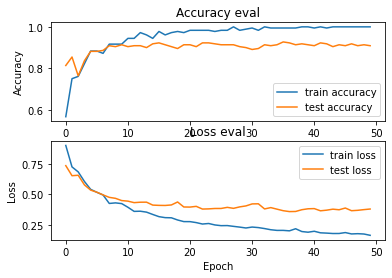

In [21]:
res = clf_model.fit(X_train, y_train.reshape(-1, 1), epochs=50, batch_size=3,
              validation_data=(X_val, y_val.reshape(-1, 1)), verbose=2)

plot_history(res)

In [6]:
X_test = np.load('trained_data/X_test.npy')

In [7]:
preds = clf_model.predict(X_test)

In [8]:
for i in range(len(preds)):
    if preds[i] >= 0.5:
        preds[i] = 1
    else:
        preds[i] = 0

In [9]:
predictions = pd.DataFrame()
predictions["id"] = np.arange(1, 81)
predictions["target"] = preds

predictions.to_csv('DogVSCat.csv', index=False, header=predictions.columns)
predictions.head(10)

,id,target
0,1,1.0
1,2,0.0
2,3,0.0
3,4,1.0
4,5,1.0
5,6,0.0
6,7,1.0
7,8,1.0
8,9,1.0
9,10,0.0


In [10]:
predictions['target'].value_counts()

0.0    47
1.0    33
Name: target, dtype: int64

In [ ]:
# To Save your model if you want
# clf_model.save('saved_model/my_model')
# To reload Your model
# new_model =load_model('saved_model/my_model')